In [ ]:
# Import several libraries that we will use below
import numpy as np
import pandas as pd
import sklearn
import keras

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression , Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from keras import layers, Sequential
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense

In [ ]:
import pandas as pd

# Load the dataset from the Excel file
# file_path = r"C:\Users\frm19\OneDrive - Wageningen University & Research\2. Thesis - Information Technology\7. Datasets\drl-minigreenhouse-datasets\compiled-real-and-measurements-datasets-cleaned.xlsx"
file_path = r"training.xlsx"
mgh_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
mgh_data.head()

# Drop rows with missing values
# mgh_data = mgh_data.dropna()

# Length of dataset
num_rows = len(mgh_data)
print(f'Number of rows: {num_rows}')



In [ ]:
# Inspect the dataset
mgh_data.head(5)

In [ ]:
# Select features and target variable
X = mgh_data[['time', 'co2 in - sim', 'rh in - sim', 'temperature in - sim', 'par in - sim']]
y = mgh_data['rh in - real']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)


In [ ]:
# Scale the dataset 
# Normalize the features
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [ ]:
# Check the structure
model.summary()

In [ ]:
# Compile the model
# Set things up
# set things up
model.compile(loss='mse', metrics=['mae', 'R2Score'], optimizer='rmsprop')

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, validation_split=0.2, verbose=1)


#### Monitoring the training process

We will visualize the model training process, and see how these metrics evolve during

In [ ]:
# Plot loss (MSE) for both training and validation split

sns.lineplot(x=history.epoch, y=history.history['loss'], color='g', label='training')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='b', label='validation')
plt.title('Model loss during training')
plt.ylabel('loss')
plt.xlabel('training epoch')
plt.legend(loc='upper right')

In [ ]:
# Plot R2 for both training and validation split

sns.lineplot(x=history.epoch, y=history.history['R2Score'], color='g', label='training')
sns.lineplot(x=history.epoch, y=history.history['val_R2Score'], color='b', label='validation')

plt.title('R2 during training')
plt.ylabel('R2')
plt.xlabel('epoch')
plt.legend(loc='lower right')

#### Evaluate with the independent test set

In [ ]:
# Make predictions on the test set
y_hat_test = model.predict(X_test_scaled)

# Calculate MAE and R² score
mae = mean_absolute_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# Plotting the test vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# AUTOMATE THE PROCESS 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
import pandas as pd

# Load the datasets from separate files
file_path_training = r"training.xlsx"
file_path_test = r"test.xlsx"

# Load and clean the training dataset
mgh_data_training = pd.read_excel(file_path_training)
#mgh_data_training = mgh_data_training.dropna()  # Drop rows with missing values

# Load and clean the test dataset
mgh_data_test = pd.read_excel(file_path_test)
#mgh_data_test = mgh_data_test.dropna()  # Drop rows with missing values

# Display the first few rows of the cleaned training and test dataframes
print("Training Data Sample:")
print(mgh_data_training.head())

print("\nTest Data Sample:")
print(mgh_data_test.head())

# Length of dataset
num_rows_training = len(mgh_data_training)
print(f'\nNumber of rows training: {num_rows_training}')

num_rows_test = len(mgh_data_test)
print(f'Number of rows test: {num_rows_test}')

# Show all rows and columns of the test dataframe
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns

# print("\nFull Test Data:")
# print(mgh_data_test)

# # Reset options to default
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')


Training Data Sample:
   time  co2 in - sim  co2 in - real  temperature in - sim  \
0     0    387.474356          400.0             16.500000   
1     5    392.078871          400.0             20.745084   
2    10    391.790383          400.0             21.157784   
3    15    391.145076          400.0             21.251775   
4    20    390.487229          400.0             21.302982   

   temperature in - real  rh in - sim  rh in - real  par in - sim  \
0              22.115636    54.900000     55.663273       1.47176   
1              22.244381    44.006484     55.457584       1.47176   
2              22.395222    44.782880     55.163654       1.47176   
3              22.530329    46.312318     54.890994       1.47176   
4              22.618859    47.833660     54.744052       1.47176   

   par in - real  fruitDryWeight  
0       1.447017      312.000000  
1       1.427925      311.995407  
2       1.422000      311.990854  
3       1.420025      311.986337  
4       1.41936

In [3]:
def train_and_evaluate_model(target_variable, _epochs=100, _batch_size=10):
    # Select features and target variable for training and test data
    features = ['time', 'co2 in - sim', 'rh in - sim', 'temperature in - sim', 'par in - sim']
    
    # Training data
    X_train = mgh_data_training[features]
    y_train = mgh_data_training[target_variable]
    
    # Test data
    X_test = mgh_data_test[features]
    y_test = mgh_data_test[target_variable]

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the ANN model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    # model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='mse', metrics=['mae', 'R2Score'], optimizer='rmsprop')

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=_epochs, batch_size=_batch_size, validation_split=0.2, verbose=1)

    # Make predictions on the test set
    y_hat_test = model.predict(X_test_scaled)

    # Calculate MAE and R² score
    mae = mean_absolute_error(y_test, y_hat_test)
    r2 = r2_score(y_test, y_hat_test)
    
    # Plot loss (MSE) for both training and validation split
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=history.epoch, y=history.history['loss'], color='g', label='training')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='b', label='validation')
    plt.title('Model loss during training')
    plt.ylabel('loss')
    plt.xlabel('training epoch')
    plt.legend(loc='upper right')
    
    # Plot R2 for both training and validation split
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=history.epoch, y=history.history['R2Score'], color='g', label='training')
    sns.lineplot(x=history.epoch, y=history.history['val_R2Score'], color='b', label='validation')

    plt.title('R2 during training')
    plt.ylabel('R2')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    # Print MAE and R²
    print(f"\nTarget Variable: {target_variable}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")

    # Plotting the test vs predicted values
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_hat_test, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for {target_variable}\nMAE: {mae:.2f}, R²: {r2:.2f}')
    plt.legend()
    
    # Plot the test vs predicted values in order
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
    plt.plot(range(len(y_hat_test)), y_hat_test, marker='x', linestyle='--', color='red', label='Predicted')
    plt.title(f'Actual vs Predicted Values for {target_variable}')
    plt.xlabel('Index')
    plt.ylabel(target_variable)
    plt.legend()
    plt.show()

Epoch 1/200


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -30.2799 - loss: 808.5507 - mae: 20.8918 - val_R2Score: -1.6344 - val_loss: 102.9989 - val_mae: 7.8989
Epoch 2/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - R2Score: 0.1635 - loss: 21.1387 - mae: 3.6184 - val_R2Score: -1.6537 - val_loss: 103.7527 - val_mae: 7.8966
Epoch 3/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - R2Score: 0.2524 - loss: 19.2236 - mae: 3.4409 - val_R2Score: -0.7898 - val_loss: 69.9763 - val_mae: 6.1919
Epoch 4/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - R2Score: 0.3066 - loss: 17.5547 - mae: 3.2964 - val_R2Score: -1.4601 - val_loss: 96.1819 - val_mae: 7.6087
Epoch 5/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.3615 - loss: 16.2383 - mae: 3.1385 - val_R2Score: -2.0828 - val_loss: 120.5268 - val_mae: 8.7488
Epoch 6/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.4124 - loss: 14.8279 - mae: 2.9933 - val_R2Score: -2.6372 - val_loss: 142.2014 - val_mae: 9.6727
Epoch 7/200
13

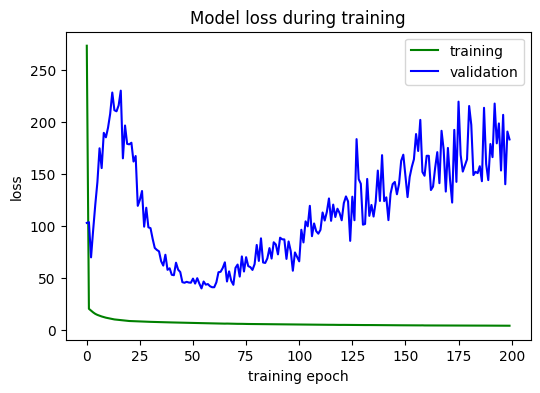

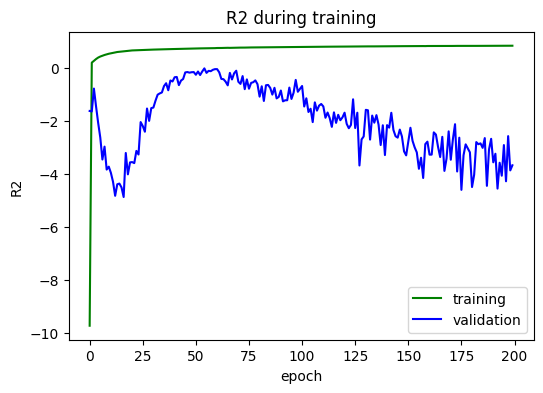

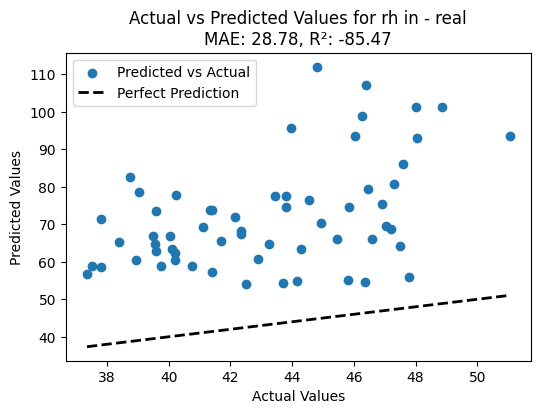

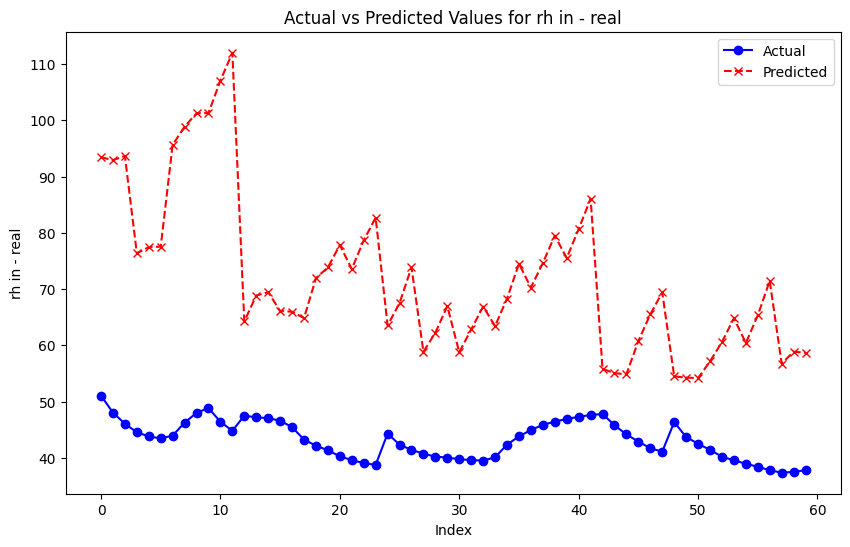

Epoch 1/200


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -45.7435 - loss: 108.9189 - mae: 6.8032 - val_R2Score: -3.0125 - val_loss: 3.2619 - val_mae: 1.4903
Epoch 2/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9522 - loss: 0.1173 - mae: 0.2491 - val_R2Score: -1.0041 - val_loss: 1.6292 - val_mae: 0.9952
Epoch 3/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9630 - loss: 0.0893 - mae: 0.2249 - val_R2Score: -1.5105 - val_loss: 2.0409 - val_mae: 1.1005
Epoch 4/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9668 - loss: 0.0825 - mae: 0.2158 - val_R2Score: -0.5500 - val_loss: 1.2601 - val_mae: 0.8541
Epoch 5/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9673 - loss: 0.0808 - mae: 0.2133 - val_R2Score: -1.2061 - val_loss: 1.7934 - val_mae: 1.1122
Epoch 6/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9676 - loss: 0.0786 - mae: 0.2118 - val_R2Score: 0.2458 - val_loss: 0.6131 - val_mae: 0.6357
Epoch 7/200
1383/1383 ━━━━━━━━━━━━━━━

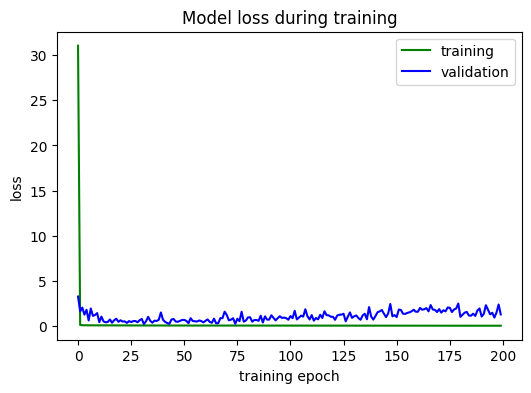

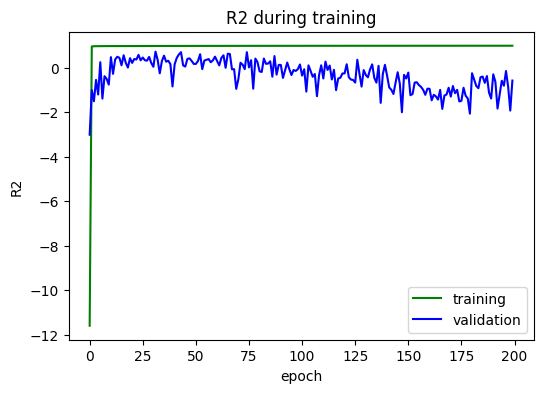

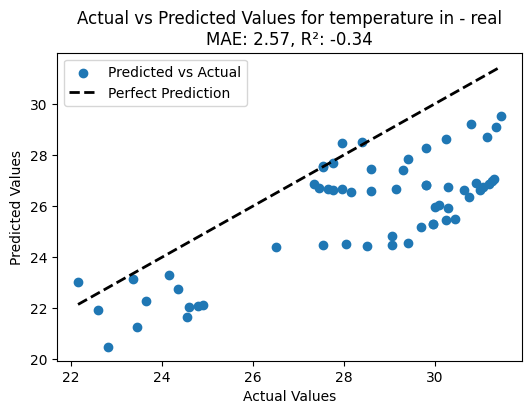

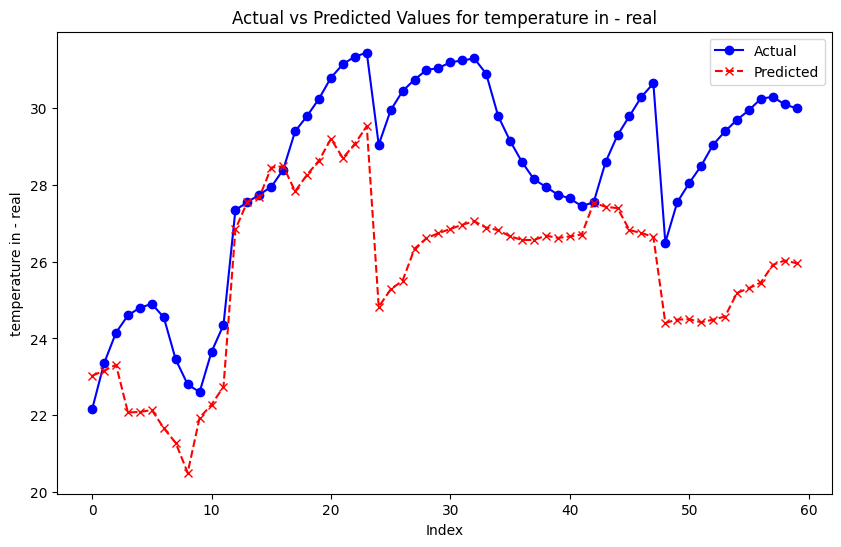

Epoch 1/200


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.7390 - loss: 1.4553 - mae: 0.5986 - val_R2Score: 0.8477 - val_loss: 0.9111 - val_mae: 0.5664
Epoch 2/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - R2Score: 0.9332 - loss: 0.3929 - mae: 0.2722 - val_R2Score: 0.7967 - val_loss: 1.2165 - val_mae: 0.6744
Epoch 3/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9240 - loss: 0.4474 - mae: 0.2657 - val_R2Score: 0.8925 - val_loss: 0.6433 - val_mae: 0.4361
Epoch 4/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - R2Score: 0.9351 - loss: 0.3809 - mae: 0.2614 - val_R2Score: 0.8633 - val_loss: 0.8176 - val_mae: 0.4745
Epoch 5/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9446 - loss: 0.3164 - mae: 0.2474 - val_R2Score: 0.8656 - val_loss: 0.8043 - val_mae: 0.5805
Epoch 6/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.9457 - loss: 0.3100 - mae: 0.2396 - val_R2Score: 0.8981 - val_loss: 0.6097 - val_mae: 0.4730
Epoch 7/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 

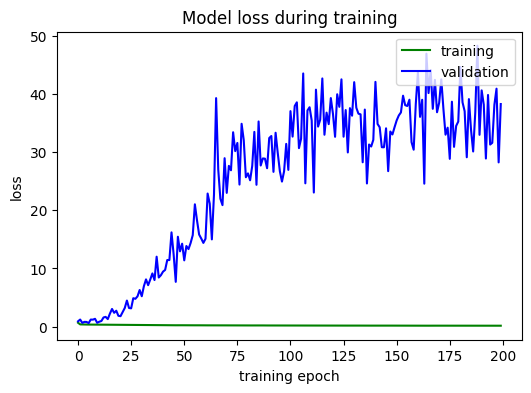

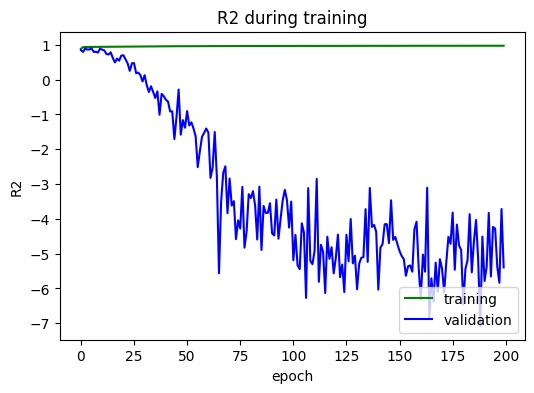

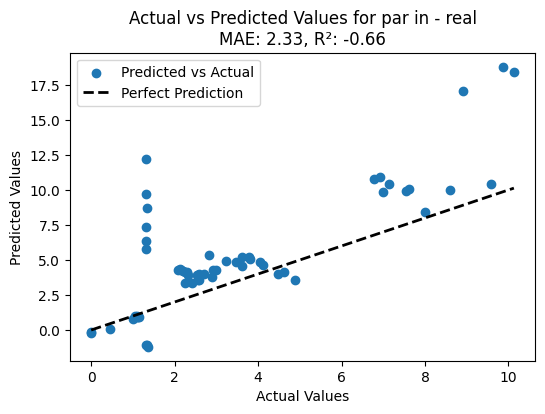

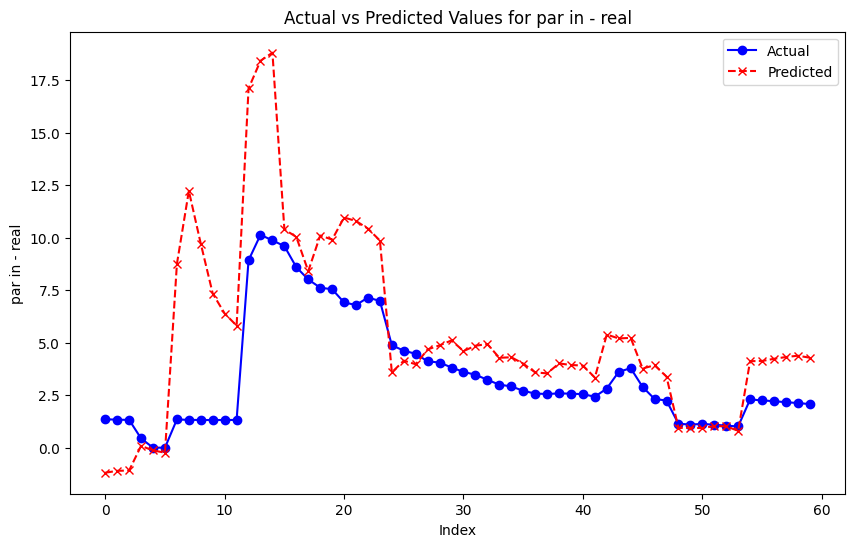

Epoch 1/200


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - R2Score: -243362.7656 - loss: 87825.5391 - mae: 255.9383 - val_R2Score: -1904.2975 - val_loss: 1905.2975 - val_mae: 35.6250
Epoch 2/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -248.4948 - loss: 102.6438 - mae: 6.4908 - val_R2Score: -133.9635 - val_loss: 134.9635 - val_mae: 6.0254
Epoch 3/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -4.5305 - loss: 2.9086 - mae: 1.1923 - val_R2Score: -82.6965 - val_loss: 83.6965 - val_mae: 5.1001
Epoch 4/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -4.1377 - loss: 2.0316 - mae: 0.9874 - val_R2Score: -39.5950 - val_loss: 40.5950 - val_mae: 2.8637
Epoch 5/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -3.3745 - loss: 1.9235 - mae: 0.9573 - val_R2Score: -33.8043 - val_loss: 34.8043 - val_mae: 2.7371
Epoch 6/200
1383/1383 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: -3.5008 - loss: 1.8895 - mae: 0.9482 - val_R2Score: -31.3262 - val_loss: 32.3262 - val_mae: 2.4461


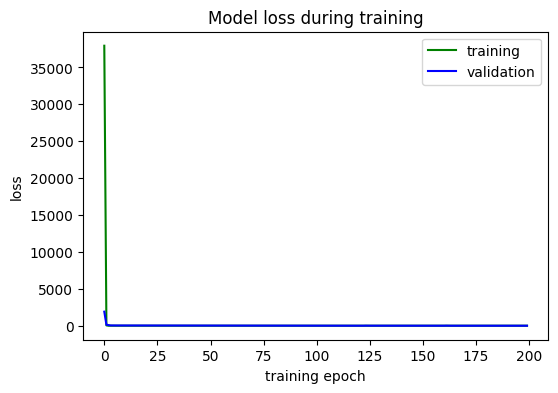

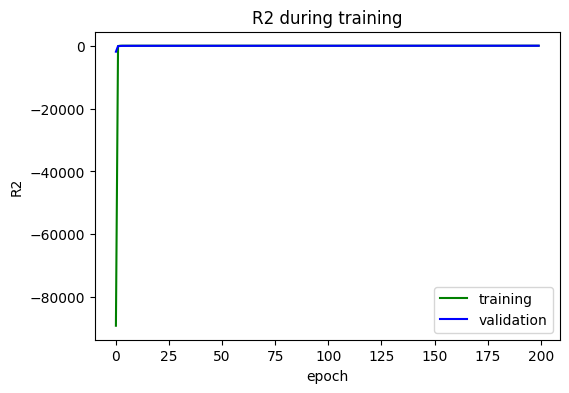

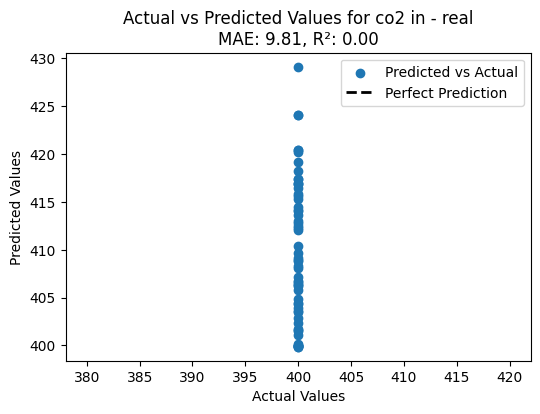

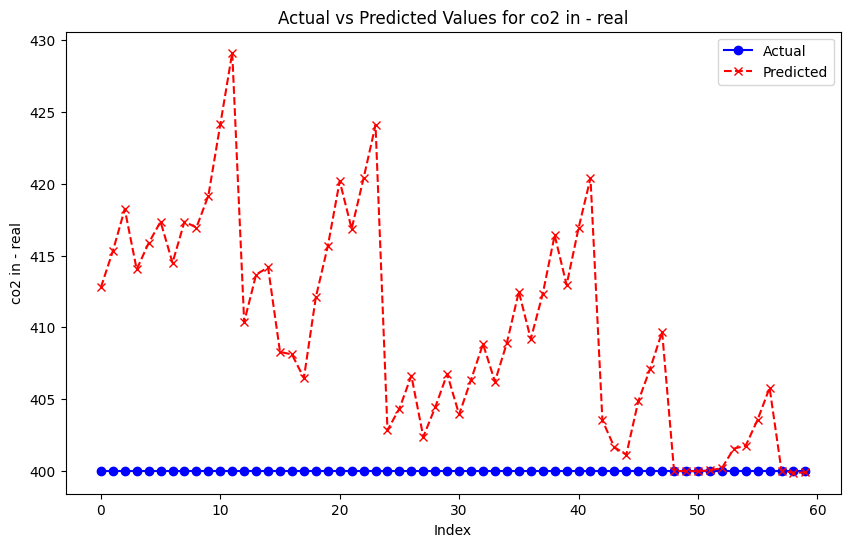

In [4]:
# List of target variables
target_variables = ['rh in - real', 'temperature in - real', 'par in - real', 'co2 in - real']

# Iterate through each target variable and call the function
for target in target_variables:
    train_and_evaluate_model(target, 200, 10)